# Initialising and Manipulating Datasets

In [26]:
data_path = "datasets/"
#import os
#os.chrdir("C:\Users\jayde\Desktop\CA1")
import numpy as np
from matplotlib import pyplot as plt

#importing datasets
#Nucleus Types of families by ethnic groups, for pie chart and bar chart
nucData = np.loadtxt(data_path + 'nucleus_by_ethnic.csv', delimiter=',', unpack=True, skiprows=1, dtype='int,object,object,float')
#Average ages by ethnic groups for line chart
ageData = np.loadtxt(data_path + 'average_age_ethnic.csv', delimiter=',', unpack=True, skiprows=1, dtype='int,object,float,int')
#flat type data for histogram 
flatData= np.loadtxt(data_path + 'houses_by_rooms.csv', delimiter=',', unpack=True, skiprows=1, dtype='int,int,int')
#Resale flat prices 2015-2016
resaleData=np.loadtxt(data_path + 'resale_flat_prices.csv',delimiter=',',unpack=True, skiprows=1, dtype='object,object,object,float,int,float')
#Resale flat prices 2012-2014
resaleOldData=np.loadtxt(data_path + 'resale_flat_prices_old.csv',delimiter=',',unpack=True, skiprows=1, dtype='object,object,object,float,int,float')

#Reshaping data (worksheet,rows,columns)
nucData=np.reshape(nucData,(4,3,12))
ageData = np.reshape(ageData,(4,3,3))
flatData=np.reshape(flatData,(3,3,6))
resaleData=np.reshape(resaleData,(6,37153))
resaleOldData=np.reshape(resaleOldData,(6,52203))

In [27]:
#Data manipulation 
resaleDates=list(map(lambda x: int(x[:-3]),resaleData[0])) #Get list of first row in array, but without last 3 characters in strings to just get the year
resaleData[0]=resaleDates  #Change the first row in actual array to the new list
resaleYearsRemaining=list(map(lambda x,y: 99-(x-y),resaleData[0],resaleData[4])) #Calculate the number of years remaining in lease as a new list (99 year lease)
resaleData=np.insert(resaleData,6,np.array(resaleYearsRemaining),axis=0) #Insert list into a new row in array

# Numpy Summary of Datasets

### *Households of different Flat Type*

In [28]:
#numpy summary flatData

#numpy functions to get shape and number of dimensions of array
shape=np.shape(flatData)
dimensions=np.ndim(flatData)
size=np.size(flatData)
#Lists of 'metadata' for our array
columns=['Year','Number of rooms', 'Number of flats']
datatypes=['Integer','Integer','Integer']
descriptions=['Year survey result was taken from',
              'Number of rooms of household (6 refers to Executive flats)',
              'Number of households of that flat type that year']

#Print out information about our array
print("DATASET ANALYSIS: \n\nSample Household Survey: HDB Households, by Flat Type\n")
print(f"Number of columns: {shape[0]}")
print(f"Number of total rows: {shape[1]*shape[2]}")
print(f"Rows split by years into {shape[1]} sub-arrays with {shape[2]} elements each ")
print(f"Number of dimensions of array: {dimensions}")
print(f"No. of total elements in array: {size}")
print(f"Final shape of array: {shape[0]}x{shape[1]}x{shape[2]}")

#Print out 'metadata' about our array
print("\n\nColumn Name       Distincts Data Type    Description")
for i in range(0,len(columns)):
  print(f"{columns[i]:<18}{len(np.unique(flatData[i])):<10}{datatypes[i]:<13}{descriptions[i]}")

DATASET ANALYSIS: 

Sample Household Survey: HDB Households, by Flat Type

Number of columns: 3
Number of total rows: 18
Rows split by years into 3 sub-arrays with 6 elements each 
Number of dimensions of array: 3
No. of total elements in array: 54
Final shape of array: 3x3x6


Column Name       Distincts Data Type    Description
Year              3         Integer      Year survey result was taken from
Number of rooms   6         Integer      Number of rooms of household (6 refers to Executive flats)
Number of flats   18        Integer      Number of households of that flat type that year


### *Family Nucleus Types*

In [29]:
#numpy summary NucData

#numpy functions to get shape and number of dimensions of array
shape=np.shape(nucData)
dimensions=np.ndim(nucData)
size=np.size(nucData)

#Lists of 'metadata' for our array
columns=['Year','Ethnic Group', 'Family Nucleus','Percentage']
datatypes=['Integer','String','String','Float']
descriptions=['Year survey result was taken from',
              'Ethnic Group of families in household',
              '''Nucleus Type of family in household. 
                                           Nuclear= consisting of parents and their children. 
                                           Extended Nuclear= consisting of parents,children, aunts, uncles, grandparents, or cousins. 
                                           Multi nuclear= Multiple nuclear families living together
                                           Non nuclear=Single person living in household 
              ''',
              'Percentage of Households with this nucleus type out of all households of same ethnic group']

#Print out information about our array
print("DATASET ANALYSIS: \n\nSample Household Survey: Type of Family Nucleus of HDB Households, by Ethnic Group\n")
print(f"Number of columns: {shape[0]}")
print(f"Number of total rows: {shape[1]*shape[2]}")
print(f"Rows split by years into {shape[1]} sub-arrays with {shape[2]} elements each ")
print(f"Number of dimensions of array: {dimensions}")
print(f"No. of total elements in array: {size}")
print(f"Final shape of array: {shape[0]}x{shape[1]}x{shape[2]}")

#Print out 'metadata' about our array
print("\n\nColumn Name       Distincts Data Type      Description")
for i in range(0,len(columns)):
  print(f"{columns[i]:<18}{len(np.unique(nucData[i])):<10}{datatypes[i]:<15}{descriptions[i]}")

DATASET ANALYSIS: 

Sample Household Survey: Type of Family Nucleus of HDB Households, by Ethnic Group

Number of columns: 4
Number of total rows: 36
Rows split by years into 3 sub-arrays with 12 elements each 
Number of dimensions of array: 3
No. of total elements in array: 144
Final shape of array: 4x3x12


Column Name       Distincts Data Type      Description
Year              3         Integer        Year survey result was taken from
Ethnic Group      3         String         Ethnic Group of families in household
Family Nucleus    4         String         Nucleus Type of family in household. 
                                           Nuclear= consisting of parents and their children. 
                                           Extended Nuclear= consisting of parents,children, aunts, uncles, grandparents, or cousins. 
                                           Multi nuclear= Multiple nuclear families living together
                                           Non nuclear=Single per

### *Resale data 2012-2014*

In [30]:
#numpy summary resaleOldData

#numpy functions to get shape and number of dimensions of array
shape=np.shape(resaleOldData)
dimensions=np.ndim(resaleOldData)
size=np.size(resaleOldData)

#Lists of 'metadata' for our array
columns=['Year Purchased','Flat Type', 'Storey Range','Floor Area','Lease Commence Year','Resale Price']
datatypes=['Integer','String','String','Float','Integer','Float','Integer']
descriptions=['Year of resale',
              'Type of flat',
              "Range where flat's storey lies within",
              "Floor area of flat in square meters",
              "Year of initial lease of flat",
              "Resale price in SGD"]

#Print out information about our array
print("DATASET ANALYSIS: \n\nResale Flat Prices 2012-2014\n")
print(f"Number of columns: {shape[0]}")
print(f"Number of total rows: {shape[1]}")
print(f"Number of dimensions of array: {dimensions}")
print(f"No. of total elements in array: {size}")
print(f"Final shape of array: {shape[0]}x{shape[1]}")

#Print out 'metadata' about our array
print("\n\nColumn Name            Distincts Data Type    Description")
for i in range(0,len(columns)):
  print(f"{columns[i]:<23}{len(np.unique(resaleOldData[i])):<10}{datatypes[i]:<13}{descriptions[i]}")

DATASET ANALYSIS: 

Resale Flat Prices 2012-2014

Number of columns: 6
Number of total rows: 52203
Number of dimensions of array: 2
No. of total elements in array: 313218
Final shape of array: 6x52203


Column Name            Distincts Data Type    Description
Year Purchased         34        Integer      Year of resale
Flat Type              7         String       Type of flat
Storey Range           22        String       Range where flat's storey lies within
Floor Area             163       Float        Floor area of flat in square meters
Lease Commence Year    47        Integer      Year of initial lease of flat
Resale Price           2067      Float        Resale price in SGD


### *Resale Data 2015-2016*

In [31]:
#numpy summary resaleData

#numpy functions to get shape and number of dimensions of array
shape=np.shape(resaleData)
dimensions=np.ndim(resaleData)
size=np.size(resaleData)

#Lists of 'metadata' for our array
columns=['Year Purchased','Flat Type', 'Storey Range','Floor Area','Lease Commence Year','Resale Price','Years Remaining']
datatypes=['Integer','String','String','Float','Integer','Float','Integer']
descriptions=['Year of resale',
              'Type of flat',
              "Range where flat's storey lies within",
              "Floor area of flat in square meters",
              "Year of initial lease of flat",
              "Resale price in SGD",
              "Number of years remaining for lease (99 years total)"]

#Print out information about our array
print("DATASET ANALYSIS: \n\nResale Flat Prices 2015-2016\n")
print(f"Number of columns: {shape[0]}")
print(f"Number of total rows: {shape[1]}")
print(f"Number of dimensions of array: {dimensions}")
print(f"No. of total elements in array: {size}")
print(f"Final shape of array: {shape[0]}x{shape[1]}")

#Print out 'metadata' about our array
print("\n\nColumn Name            Distincts Data Type    Description")
for i in range(0,len(columns)):
  print(f"{columns[i]:<23}{len(np.unique(resaleData[i])):<10}{datatypes[i]:<13}{descriptions[i]}")

DATASET ANALYSIS: 

Resale Flat Prices 2015-2016

Number of columns: 7
Number of total rows: 37153
Number of dimensions of array: 2
No. of total elements in array: 260071
Final shape of array: 7x37153


Column Name            Distincts Data Type    Description
Year Purchased         2         Integer      Year of resale
Flat Type              7         String       Type of flat
Storey Range           17        String       Range where flat's storey lies within
Floor Area             156       Float        Floor area of flat in square meters
Lease Commence Year    48        Integer      Year of initial lease of flat
Resale Price           1748      Float        Resale price in SGD
Years Remaining        49        Integer      Number of years remaining for lease (99 years total)


### *Average Age*

In [ ]:
#numpy summary ageData

#numpy functions to get shape and number of dimensions of array
shape=np.shape(ageData)
dimensions=np.ndim(ageData)
size=np.size(ageData)
#Lists of 'metadata' for our array
columns=['Year','Ethnic Group', 'Average Age','Median Age']
datatypes=['Integer','String','Float','Integer']
descriptions=['Year survey result was taken from',
              'Ethnic Group of family in household',
              'Mean age of residents in households of same ethnic group, rounded to 1.dp',
              'Median age of residents in households of same ethnic group, rounded to whole number']

#Print out information about our array
print("DATASET ANALYSIS: \n\nSample Household Survey: Age of HDB Resident Population, by Ethnic Group\n")
print(f"Number of columns: {shape[0]}")
print(f"Number of total rows: {shape[1]*shape[2]}")
print(f"Rows split by years into {shape[1]} sub-arrays with {shape[2]} elements each ")
print(f"Number of dimensions of array: {dimensions}")
print(f"No. of total elements in array: {size}")
print(f"Final shape of array: {shape[0]}x{shape[1]}x{shape[2]}")

#Print out 'metadata' about our array
print("\n\nColumn Name       Distincts Data Type    Description")
for i in range(0,len(columns)):
  print(f"{columns[i]:<18}{len(np.unique(ageData[i])):<10}{datatypes[i]:<13}{descriptions[i]}")

DATASET ANALYSIS: 

Sample Household Survey: Age of HDB Resident Population, by Ethnic Group

Number of columns: 4
Number of total rows: 9
Rows split by years into 3 sub-arrays with 3 elements each 
Number of dimensions of array: 3
No. of total elements in array: 36
Final shape of array: 4x3x3


Column Name       Distincts Data Type    Description
Year              3         Integer      Year survey result was taken from
Ethnic Group      3         String       Ethnic Group of family in household
Average Age       8         Float        Mean age of residents in households of same ethnic group, rounded to 1.dp
Median Age        7         Integer      Median age of residents in households of same ethnic group, rounded to whole number


# Data Visualisations with MatplotLib

### *Histogram*

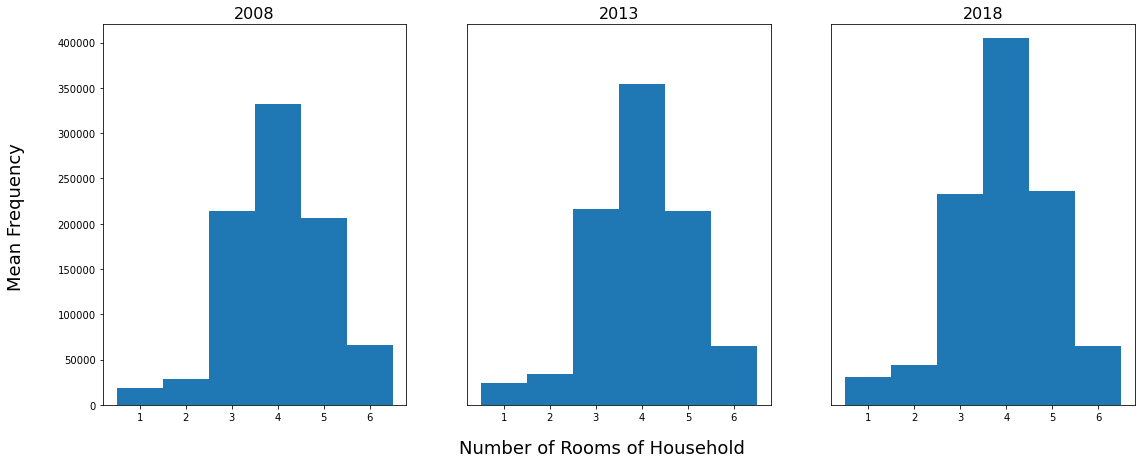

In [32]:
#Histogram
#note that Bar function is used instead of hist due to bar graph being more efficient in this scenario.
#This is because the data for frequencies is summarised in a single column in my data, so the hist function would not work well in this scenario to create my histogram
#However, my graph is still used to achieve the same purpose of histogram, to observe the shape of distribution with no gaps between bars.

#Set figure size
fig=plt.figure(figsize=(18.5,7))


#Adding 3 histograms to figure, subplots in a row of 3 for each year

#2008 Histogram
ax1=fig.add_subplot(131)
ax1.bar(flatData[1,0,:],flatData[2,0,:],width=1.0)
ax1.set_ylim([0, 420000]) #Set limits of Y axis to be same for each graph
ax1.set_title('2008', fontsize=16)

#2013 Histogram
ax2=fig.add_subplot(132)
ax2.bar(flatData[1,1,:],flatData[2,1,:],width=1.0)
ax2.set_ylim([0,420000])
ax2.set_title('2013', fontsize=16)
#Hide Y axis label
y_axis = ax2.get_yaxis()
y_axis.set_visible(False)

#2018 Histogram
ax3=fig.add_subplot(133)
ax3.bar(flatData[1,1,:],flatData[2,2,:],width=1.0)
ax3.set_ylim([0, 420000])
ax3.set_title('2018', fontsize=16)
#Hide Y axis label
y_axis = ax3.get_yaxis()
y_axis.set_visible(False)


fig.text(0.5, 0.04, 'Number of Rooms of Household', ha='center', va='center',fontsize=18)
fig.text(0.06, 0.5, 'Mean Frequency', ha='center', va='center', rotation='vertical',fontsize=18)
plt.show()

### *Bar Graph*

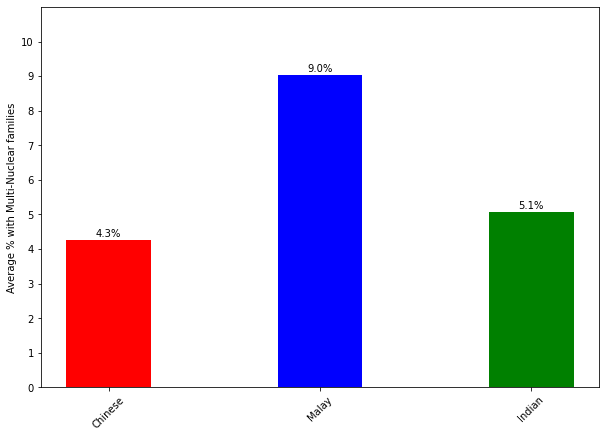

In [33]:
#Bar graph showing the % of multi-nuclear families among the different ethnic groups
fig=plt.figure(figsize=(10,7))
x_labels=['Chinese','Malay','Indian'] #labels for x axis


#Get from percentage worksheet (4th), all rows, and 3rd, 7th, and 11th column respectively.
chineseMulti=nucData[3,:,2]
malayMulti=nucData[3,:,6]
indianMulti=nucData[3,:,10]

#Plot the 3 bars on the single graph
ax1=fig.add_subplot(111)

ax1.bar(0,np.mean(chineseMulti),label="chinese",width=0.4, color='r') 
ax1.bar(1,np.mean(malayMulti),label="malay",width=0.4, color='b') 
ax1.bar(2,np.mean(indianMulti),label="indian",width=0.4, color='g') 

#Changing ticks and labels on axises
ax1.set_xticks(np.arange(3)) 
ax1.set_xticklabels(x_labels, rotation=45) 
plt.ylim(0,11) 
plt.yticks(np.arange(0, 11, 1)) 
plt.ylabel("Average % with Multi-Nuclear families")


#PUTTING LABELS ON EACH BARS
for rect in ax1.patches:
  # Get X and Y placement of label from rect.
  y_value = rect.get_height()
  x_value = rect.get_x() + rect.get_width() / 2  #divide by 2 to get center
  # Use Y value as label and format number with one decimal place

  # Create annotation
  ax1.annotate(
    f"{y_value:.1f}%",          # String formatted label here
    (x_value, y_value),         # Coordinates for top of bar
    xytext=(0, 3),              # Spacing between bar and text 
    textcoords="offset points", # Puts labels in individuals bars instead of all on 1 bar
    ha='center',                # Horizontally center label on bar
  )                      

plt.show()


### *Pie Chart*

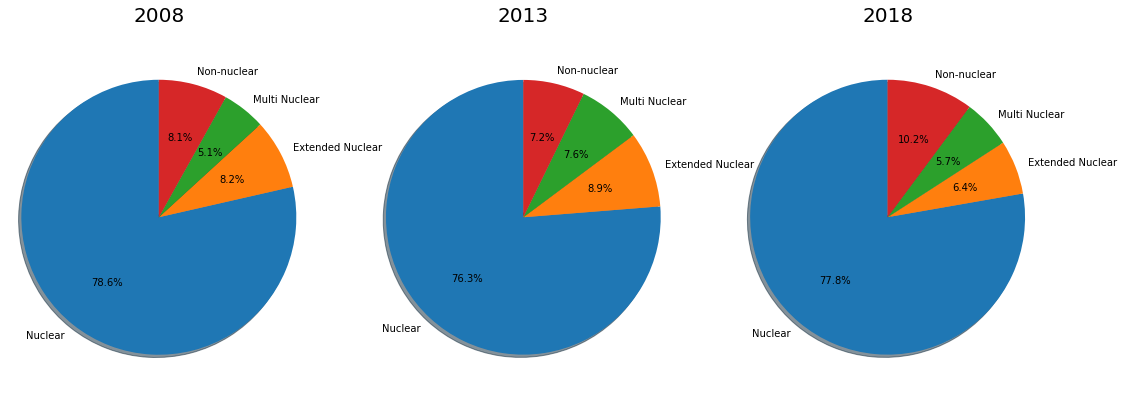

In [ ]:
#Pie chart showing composition of nuclear types of families by year (1 chart per year)
#Get arrays of nuclear,extended nuclear, multi nuclear and non nuclear percentages, and get mean of each year
nuclearArray=np.mean(nucData[3,:,0::4],1)
extendedArray=np.mean(nucData[3,:,1::4],1)
multiArray=np.mean(nucData[3,:,2::4],1)
nonnucArray=np.mean(nucData[3,:,3::4],1)
#concatenate the arrays, then reshape into 4x3 shape, then transpose so that percentages get read as a single array
percentArray=np.concatenate((nuclearArray,extendedArray,multiArray,nonnucArray))
percentArray=np.reshape(percentArray,(4,3))
percentArray=np.transpose(percentArray)

#Set labels for pie chart as well as size of the whole figure
labels = 'Nuclear', 'Extended Nuclear', 'Multi Nuclear', 'Non-nuclear'
fig=plt.figure(figsize=(18.5,7))

#Adding each pie chart, 3 subplots in a row for each year
ax1=fig.add_subplot(131)
ax1.pie(percentArray[0], labels=labels, autopct=lambda p:f'{p:.1f}%',shadow=True, startangle=90) #autopct for labelling, use string formatting to get 1 decimal point
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('2008', fontsize=20)

ax2=fig.add_subplot(132)
ax2.pie(percentArray[1], labels=labels, autopct=lambda p:f'{p:.1f}%',shadow=True, startangle=90)
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax2.set_title('2013', fontsize=20)

ax3=fig.add_subplot(133)
ax3.pie(percentArray[2], labels=labels, autopct=lambda p:f'{p:.1f}%',shadow=True, startangle=90)
ax3.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax3.set_title('2018', fontsize=20)
plt.show()


### *Boxplot*

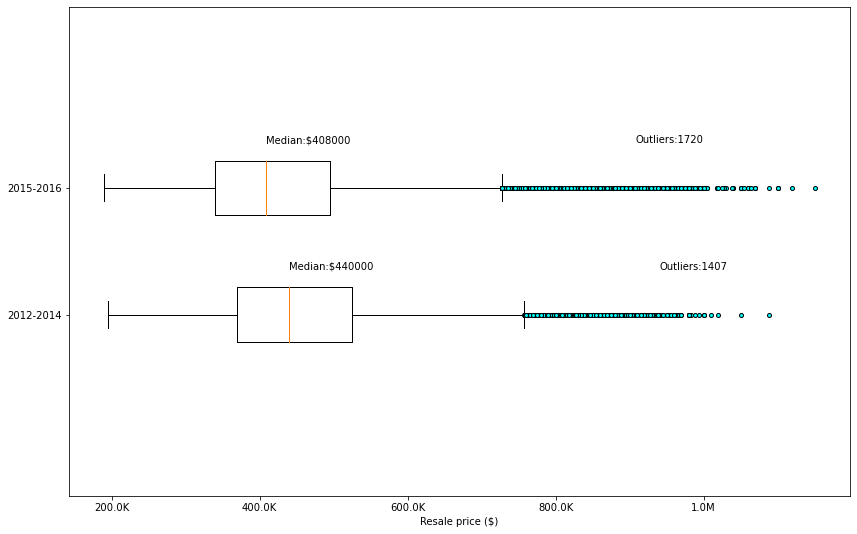

In [34]:
#Boxplot
fig=plt.figure(figsize=(14,9))
ax=fig.add_subplot(111)
data=np.array([resaleOldData[5],resaleData[5]],dtype="object")
bplot=ax.boxplot(data,labels=['2012-2014','2015-2016'],vert=False, flierprops={'markersize': 4, 'markerfacecolor': 'cyan'}, positions=[1,1.35]) #change outlier size and colour
plt.xlabel('Resale price ($)')
#Formatting X axis ticks
from matplotlib.ticker import FuncFormatter
def human_format(num,pos):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    # add more suffixes if you need them
    return '%.1f%s' % (num, ['', 'K', 'M', 'G', 'T', 'P'][magnitude])

#Overlay Medians
for line in bplot['medians']:  
  x, y = line.get_xydata()[1] # overlay median value based on position value x,y 
  plt.text(x, y+0.05, f'Median:${int(x)}')


#Overlay Outliers
#find quartiles
q1 = np.quantile(resaleOldData[5], 0.25)
q3 = np.quantile(resaleOldData[5], 0.75)
iqr = q3-q1 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
outliers = len(resaleOldData[5][(resaleOldData[5] <= lower_bound) | (resaleOldData[5] >= upper_bound)])
#find quartiles
q1 = np.quantile(resaleData[5], 0.25)
q3 = np.quantile(resaleData[5], 0.75)
iqr = q3-q1 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
outliersNew = len(resaleData[5][(resaleData[5] <= lower_bound) | (resaleData[5] >= upper_bound)])
i=0
for line in bplot['medians']:  
  x, y = line.get_xydata()[1] # overlay median value based on position value x,y 
  if i==1:
    outliers=outliersNew
  plt.text(x+500000, y+0.05, f'Outliers:{outliers}')
  i+=1
  

formatter = FuncFormatter(human_format)
ax.xaxis.set_major_formatter(formatter)
plt.show()


### *Scatterplot*

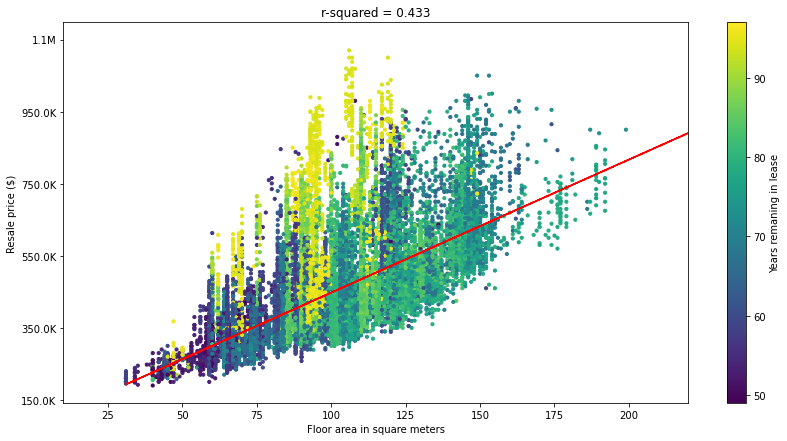

In [35]:
#Scatterplot

fig=plt.figure(figsize=(14,7))
ax=fig.add_subplot(111)
#Scatterplot plotting
scatter=ax.scatter(resaleData[3],resaleData[5],s=10,c=resaleData[6], label='color')
plt.xlim((10,220)) #Limit X axis 
fig.colorbar(scatter, label='Years remaning in lease')  #Add colour gradient legend

#Calculate r squared
correlation_matrix = np.corrcoef(list(resaleData[3]), list(resaleData[5]))
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

#Add Trend Line
z = np.polyfit(list(resaleData[3]), list(resaleData[5]), 1)
p = np.poly1d(z)
plt.plot(list(resaleData[3]),p(list(resaleData[3])),"r--")

plt.xlabel("Floor area in square meters")
plt.ylabel("Resale price ($)")
plt.yticks(np.arange(150000,1200000,step=200000))
plt.title(f"r-squared = {r_squared:.3f}")

#Formatting Y axis ticks
from matplotlib.ticker import FuncFormatter
def human_format(num,pos):
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    #Adding suffixes (K and M)
    return '%.1f%s' % (num, ['', 'K', 'M'][magnitude])
formatter = FuncFormatter(human_format)
ax.yaxis.set_major_formatter(formatter)

plt.show()

### *Line Graph*

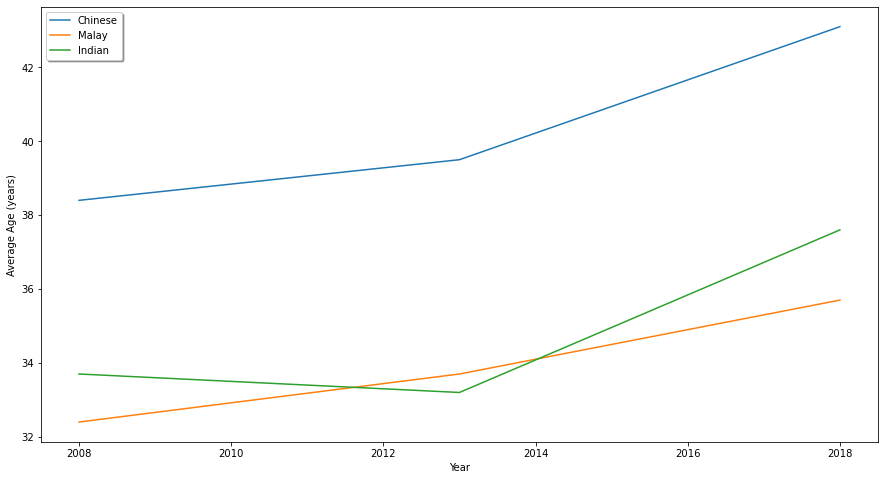

In [36]:
#line graph
x_labels = ["2008", "2013", "2018"] 
fig=plt.figure(figsize=(15,8))
ageDataTranspose=np.transpose(ageData)
ax=fig.add_subplot(111)
ax.plot(np.transpose(ageData[0])[0],ageDataTranspose[0,:,2], label='Chinese')
ax.plot(np.transpose(ageData[0])[0],ageDataTranspose[1,:,2], label='Malay')
ax.plot(np.transpose(ageData[0])[0],ageDataTranspose[2,:,2], label='Indian')

legend = ax.legend(loc='upper left', shadow=True) 
plt.ylabel("Average Age (years)")
plt.xlabel("Year")
plt.show()